In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics, cross_validation

/home/sinho/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. EDA

In [2]:
df_train = pd.read_csv('data/fashion_train.csv')

In [3]:
df_train.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,7927,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5212,0,0,0,0,0,0,0,0,0,...,23,0,0,0,0,0,0,0,0,0
2,28581,6,0,0,0,0,0,0,0,0,...,141,73,0,0,107,63,0,0,0,0
3,39089,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52059,4,0,0,0,0,0,0,0,0,...,0,0,0,19,35,7,14,0,0,0


In [4]:
df_train_X = df_train.iloc[:, 2:]
df_train_y = df_train.iloc[:,[1]]

In [5]:
df_train_X.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,72,170,...,29,39,45,53,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,0,0,0,0,0,0,0,0,0,150,...,50,15,0,0,0,0,0,0,0,0


In [6]:
df_X_array = np.array(df_train_X)
df_train_X_reshape = np.reshape(df_X_array,[42000,28,28])
print(df_train_X_reshape[1])

[[  0   0   0   0   0   0   0   0   0   3   0   5 144 126 147 153   6   0
    0   1   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   1   0   0   0   0 184 255 210 216 253 122   0
    0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3  75 176 204 120  59 192 207 115 162
   80   9   0   0   0   1   0   0   0   0]
 [  0   0   0   3   0   0  48 143 188 198 173 172 169 209 255 134 129 174
  185 183 152  77   0   0   0   0   0   0]
 [  0   0   0   0   0  97 188 178 168 168 176 177 183 200 166 192 170 163
  163 166 168 171 125   0   0   0   0   0]
 [  0   0   0   0  11 187 181 177 174 173 175 176 172 188 164 182 167 164
  169 166 160 159 162  38   0   0   0   0]
 [  0   0   0   0  97 195 182 181 179 177 175 176 177 190 163 174 166 166
  162 163 161 162 168 112   0   0   0   0]
 [  0   0   0   0 186 186 182 176 177 174 176 175 175 187 161 177 166 162
  169 166 147 160 147 154   0   0   0   0]
 [  0   0   0  48 183 175 181 198 178 178 176 174 176 184 165 17

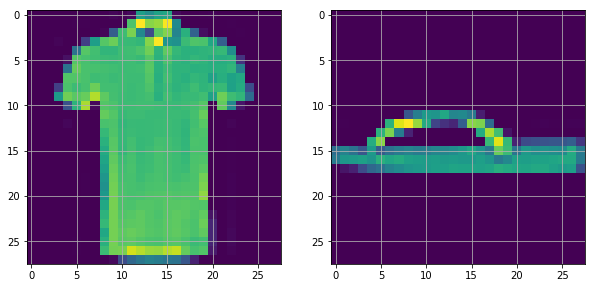

In [7]:
img = df_train_X_reshape[1]
img2 = df_train_X_reshape[3]
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.grid(True)
plt.subplot(122)
plt.imshow(img2)
plt.grid(True)


In [8]:
df_train_y_reshape = np.array(df_train_y)

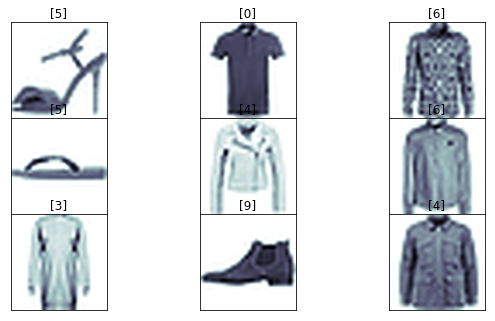

In [9]:
N=3; M=3;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(df_train_X_reshape[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(df_train_y_reshape[k])

    LABELS 설명
   
  0 T-shirt/top  <br> 
 1 Trouser <br> 
 2 Pullover <br> 
 3 Dress <br> 
 4 Coat <br> 
 5 Sandal <br> 
 6 Shirt <br> 
 7 Sneaker <br> 
 8 Bag <br> 
 9 Ankle boot <br> 

## 2.preprocessing

## 2.1 scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
df_train_X_std = sc.fit_transform(df_train_X)

In [12]:
df_train_X_std

array([[-0.01057825, -0.02245738, -0.02782222, ..., -0.1597935 ,
        -0.09021442, -0.03402649],
       [-0.01057825, -0.02245738, -0.02782222, ..., -0.1597935 ,
        -0.09021442, -0.03402649],
       [-0.01057825, -0.02245738, -0.02782222, ..., -0.1597935 ,
        -0.09021442, -0.03402649],
       ..., 
       [-0.01057825, -0.02245738, -0.02782222, ..., -0.1597935 ,
        -0.09021442, -0.03402649],
       [-0.01057825, -0.02245738, -0.02782222, ..., -0.1597935 ,
        -0.09021442, -0.03402649],
       [-0.01057825, -0.02245738, -0.02782222, ..., -0.1597935 ,
        -0.09021442, -0.03402649]])

## 2.2 PCA

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

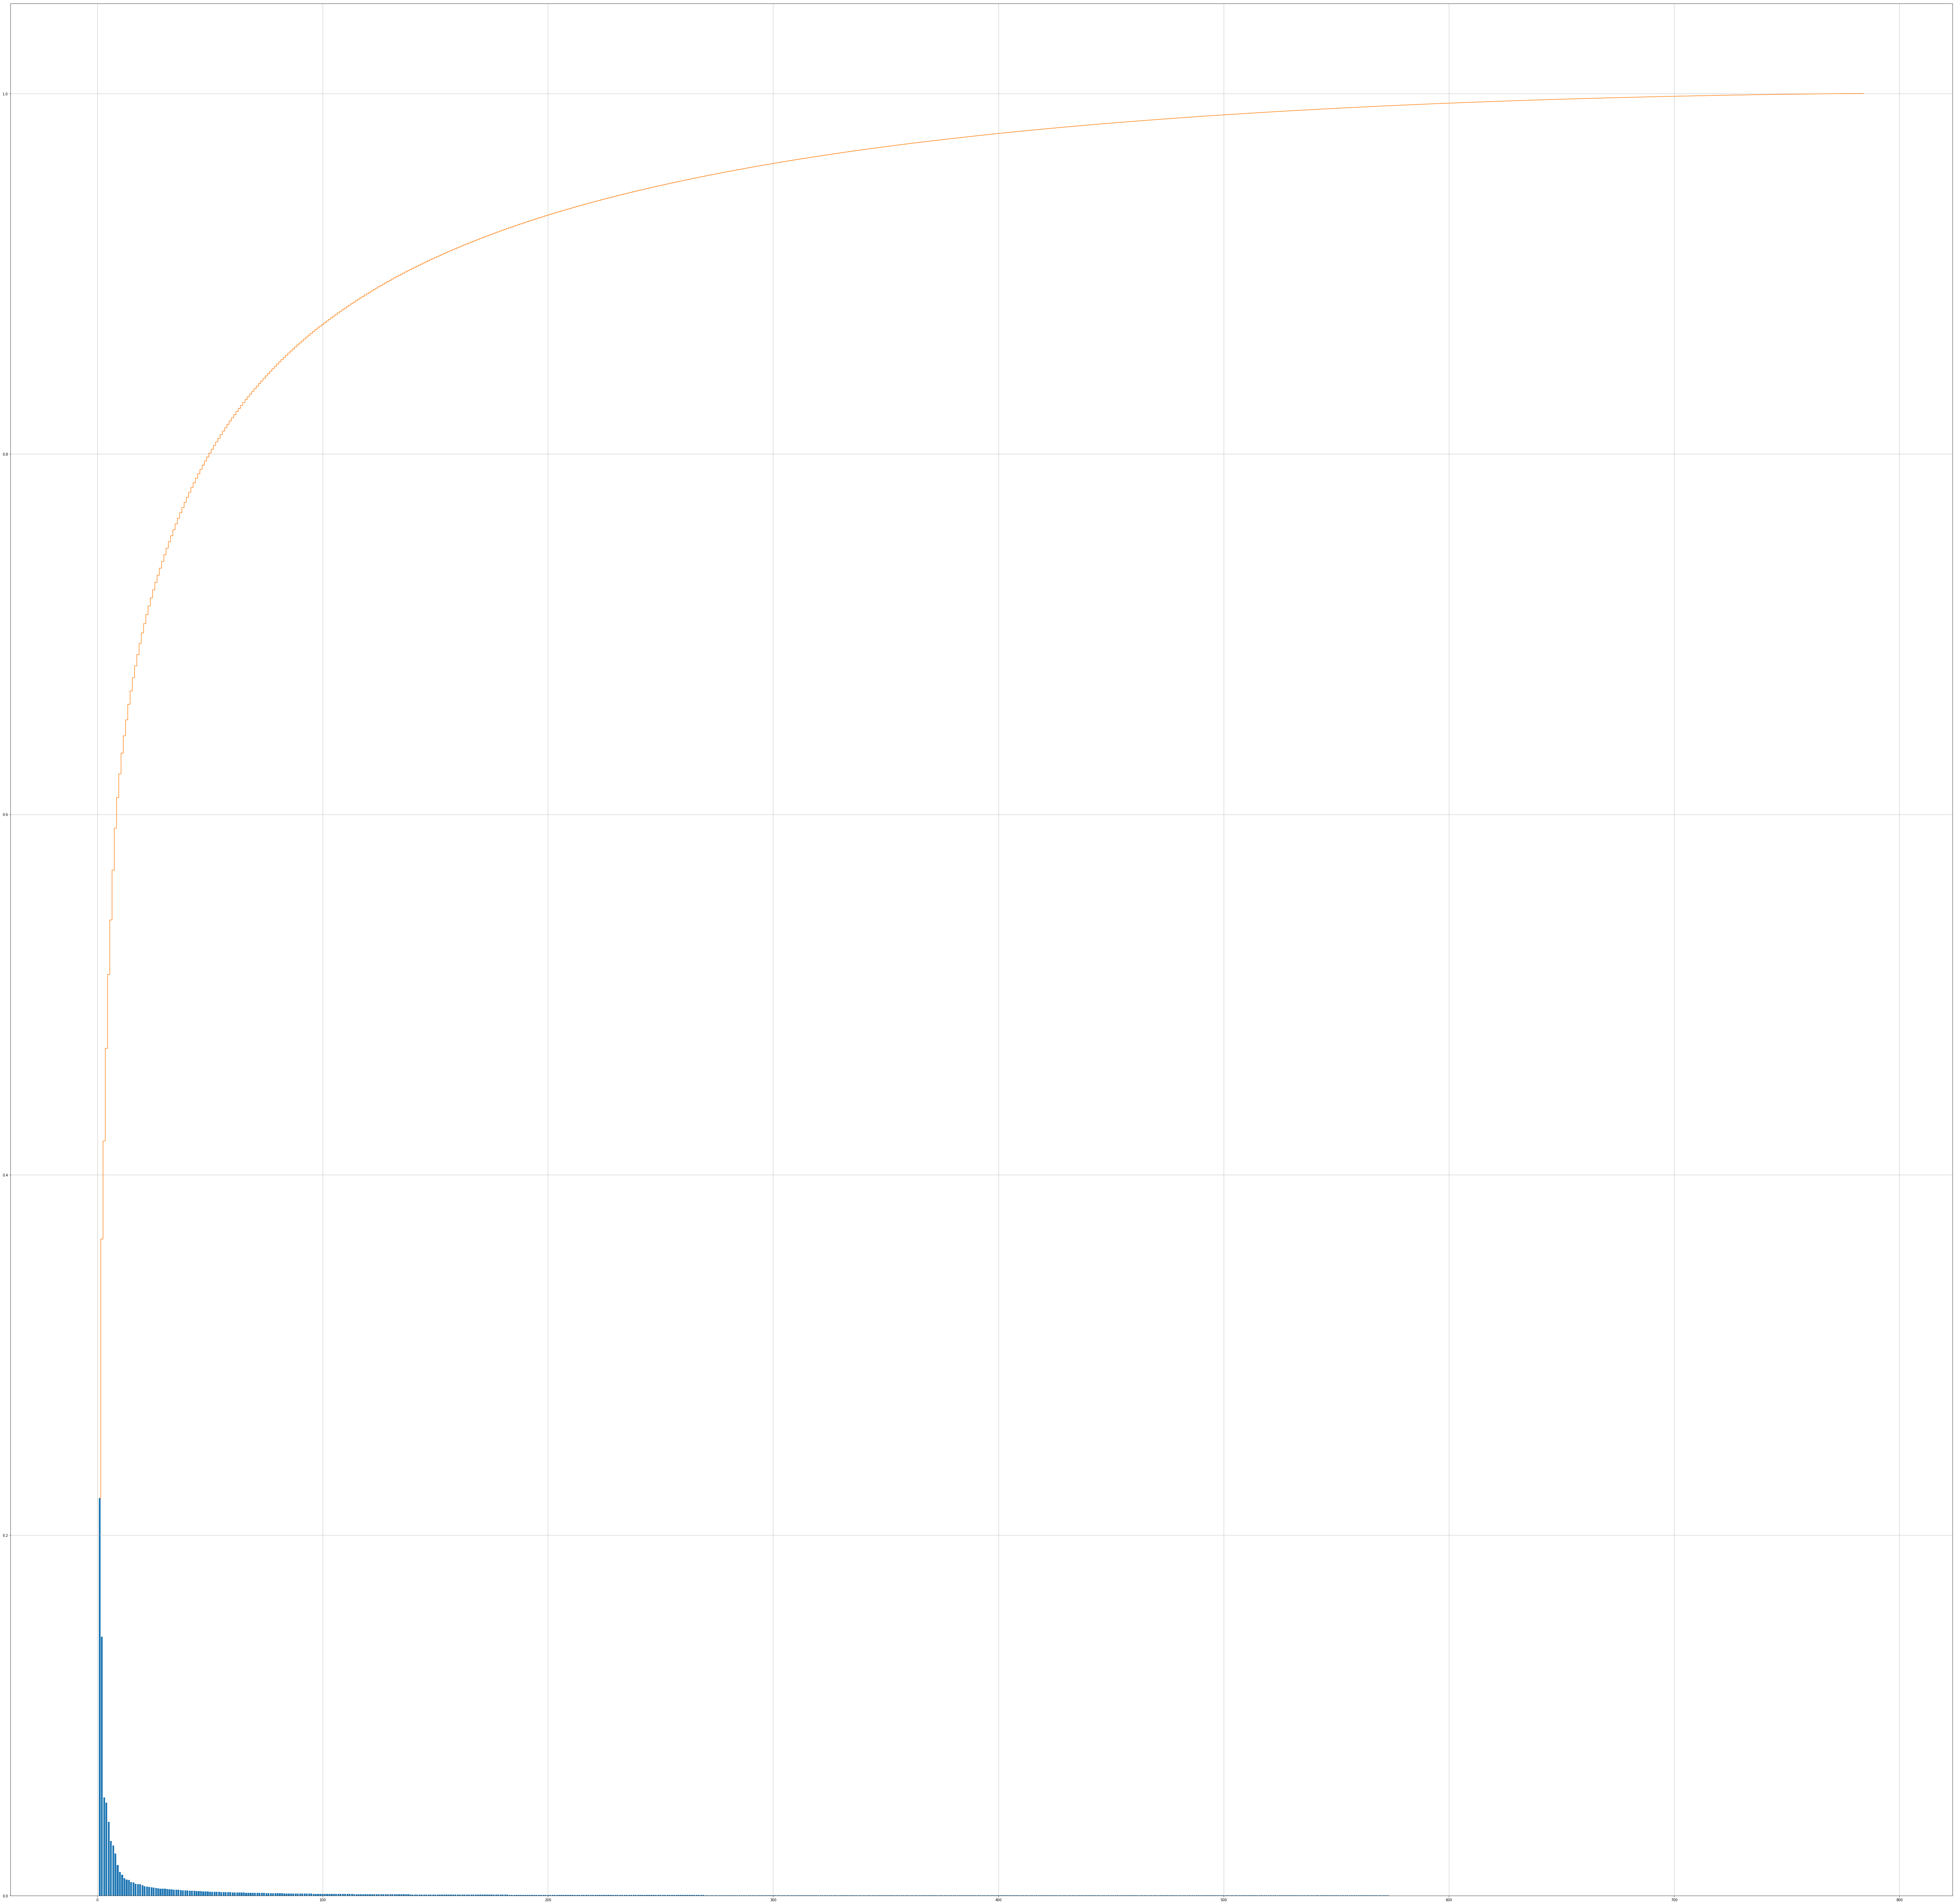

In [14]:
pca = PCA().fit(df_train_X_std)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.figure(figsize =(100,100) )
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.grid()
plt.show()

In [15]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(df_train_X_std)
X_pca

array([[ -1.54304021e+01,   5.54573033e-01,   4.35174140e+00, ...,
          6.82098230e+00,  -7.67825417e-01,  -6.19466516e-01],
       [  1.01256088e+01,  -9.70560802e+00,  -3.17121188e+00, ...,
         -2.64102103e+00,  -1.90849133e+00,  -2.45954747e+00],
       [  5.39428233e+00,  -1.64470090e+00,   8.38882864e+00, ...,
          9.09609450e-01,  -1.97348201e+00,   1.42235973e+00],
       ..., 
       [ -7.92706124e+00,  -6.98684019e+00,   9.08083590e+00, ...,
         -2.35061769e+00,  -1.42490542e+00,   6.21718751e+00],
       [ -1.31043089e+01,   1.36278065e+00,  -4.55980557e-03, ...,
         -3.40206853e+00,  -3.12393394e+00,   2.12415746e+00],
       [ -8.78617306e+00,  -1.44585526e+01,  -3.71264019e-01, ...,
          3.42974539e+00,  -4.13670299e-01,  -1.80478970e+00]])

## 3. modeling

## 3.1 SVM

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,df_train_y , test_size = 0.3 ,random_state= 0, shuffle = True)

In [ ]:
%%time
polysvc = SVC(kernel="poly",probability=True).fit(X_train, y_train)

In [ ]:
%%time
rbfsvc = SVC(kernel="rbf",probability=True).fit(X_train, y_train)

In [ ]:
%%time
sigmoidsvc = SVC(kernel="sigmoid",probability=True).fit(X_train, y_train)

In [ ]:

poly_probs = polysvc.predict_proba(X_test)
rbf_probs = rbfsvc.predict_proba(X_test)
sigmoid_probs = sigmoidsvc.predict_proba(X_test)

print('train score: {}'.format(polysvc.score(X_train, y_train)))
print('test score: {}'.format(polysvc.score(X_test, y_test)))
print()

print('train score: {}'.format(rbfsvc.score(X_train, y_train)))
print('test score: {}'.format(rbfsvc.score(X_test, y_test)))
print()

print('train score: {}'.format(sigmoidsvc.score(X_train, y_train)))
print('test score: {}'.format(sigmoidsvc.score(X_test, y_test)))
print()



## 3.1 XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier

In [ ]:
def xgboost_Grid(X_train, X_test, y_train, y_test):
        param= { 'n_estimators' : [100,200,300,400],
                      'learning_rate':  [0.01,0.05,0.10,0.15],
                      'max_depth':[3,4,5,6]}
        model_xgb = GridSearchCV(XGBClassifier(), param, scoring="accuracy",n_jobs = 4)
        name = 'XGBoost'
        model_xgb.fit(X_train, y_train)
        print(name,': ',model_xgb.best_params_)
        pred_y = model_xgb.predict_proba(X_test)
        print('train score: {}'.format(model_xgb.score(X_train, y_train)))
        print('test score: {}'.format(model_xgb.score(X_test, y_test)))
        print()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_X_std,df_train_y , test_size = 0.3 ,random_state= 0, shuffle = True)

In [ ]:
%%time
xgboost_Grid(X_train,X_test,y_train,y_test)

* preprocessing 없이 돌리면 시간이 너무 걸리므로 PCA를 활용

#### PCA_XGBOOST

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,df_train_y , test_size = 0.3 ,random_state= 0, shuffle = True)

In [ ]:
%%time
xgboost_Grid(X_train_pca,X_test_pca,y_train_pca,y_test_pca)

## 3.2 tensorflow 

In [ ]:
import tensorflow as tf

# 4.test score

## test.csv

In [ ]:
df_test = pd.read_csv('data/fashion_test.csv')
df_test.head()

In [ ]:
del df_test['Unnamed: 0']
df_test.head()

In [ ]:
df_test_X = df_test.iloc[:,1:]
df_test_y = df_test.iloc[:,0]
print(df_test_X.head())
print(df_test_y.head())

## 4.1 SVM

In [ ]:
test_poly_probs = polysvc.predict_proba(df_test_X)
test_rbf_probs = rbfsvc.predict_proba(df_test_X)
test_sigmoid_probs = sigmoidsvc.predict_proba(df_test_X)

print('log loss: {}'.format(log_loss(df_test_y, test_poly_probs)))
print()
print('log loss: {}'.format(log_loss(df_test_y, test_rbf_probs)))
print()
print('log loss: {}'.format(log_loss(df_test_y, test_sigmoid_probs)))
print()

## 4.2 XGBOOST

## 4.3 Tensor Flow

# Final